In [1]:
import numpy as np

k = 5
state = (1/np.sqrt(8))*np.array([np.exp(-1j*2*np.pi*k*(0)/8),np.exp(-1j*2*np.pi*k*(1)/8),
                                 np.exp(-1j*2*np.pi*k*(2)/8),
 np.exp(-1j*2*np.pi*k*3/8),np.exp(-1j*2*np.pi*k*4/8),np.exp(-1j*2*np.pi*k*5/8),
 np.exp(-1j*2*np.pi*k*6/8), np.exp(-1j*2*np.pi*k*7/8)])

In [2]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.providers.ibmq import IBMQ


qubits = 3 

circuit = QuantumCircuit(qubits, qubits)
circuit.initialize(state)
circuit.append(QFT(qubits),range(qubits))
circuit.measure(range(qubits),range(qubits))

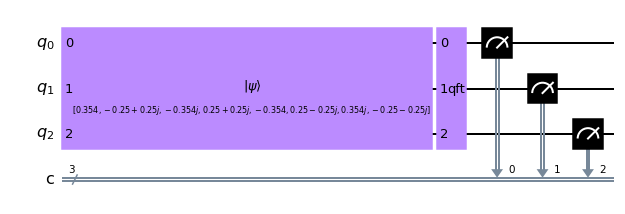

In [3]:
circuit.draw(output="mpl")

In [4]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator

backend = StatevectorSimulator()
new_circuit = transpile(circuit, backend)
statevector=backend.run(assemble(new_circuit)).result().get_statevector()
statevector

array([0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+00j,
       0.+0.00000000e+00j, 0.-0.00000000e+00j, 1.+6.67163918e-16j,
       0.+0.00000000e+00j, 0.+0.00000000e+00j])

In [5]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator

backend = QasmSimulator()
new_circuit = transpile(circuit, backend)
counts1=backend.run(assemble(new_circuit)).result().get_counts()


In [6]:
provider  = IBMQ.load_account()

In [ ]:

from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > qubits 
                                       and not x.configuration().simulator))
backend.name()

from qiskit import transpile

new_circuit = transpile(circuit, backend, optimization_level=3)

new_circuit.draw(output='mpl')

In [ ]:
from qiskit.tools.monitor import job_monitor

job = backend.run(new_circuit)
job_monitor(job)

In [ ]:
from qiskit.visualization import plot_histogram

result = job.result()
counts2 = result.get_counts()
plot_histogram([counts1,counts2])

In [ ]:
import numpy as np
from qiskit.circuit import QuantumRegister, QuantumCircuit
from qiskit.circuit.library import QFT
class DraperAdder(QuantumCircuit):
    """Adder by Draper.
    https://arxiv.org/pdf/quant-ph/0008033.pdf
    This is a QFT-based adder and requires no ancilla.
    """
    def __init__(self, num_qubits) -> None:
        a = QuantumRegister(num_qubits, 'a')
        b = QuantumRegister(num_qubits, 'b')
        super().__init__(a, b, name="draper_adder")
        qft = QFT(num_qubits, do_swaps=False)
        self.append(qft, qargs=a[:])
        for i in reversed(range(num_qubits)):
            for j in reversed(range(i+1)):
                k = 1+i-j
                self.cp(2*np.pi/2**k, b[j], a[i])
            self.barrier()
        self.append(qft.inverse(), qargs=a[:])

In [ ]:
DraperAdder(4).draw('mpl', fold=-1)